<a href="https://colab.research.google.com/github/kjcoursera/TensorFlow/blob/main/Intro_neural_nets_CA_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tensor Flow and helper libraries**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


**Training and Test Dataset**

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
#shuffle the training dataset
train_df = train_df.reindex(np.random.permutation(train_df.index))

test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")


**Normalize Values**

In [3]:
#Normalize the train_df
train_df_mean = train_df.mean()
train_df_std = train_df.std()

train_df_norm = (train_df-train_df_mean)/train_df_std

train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
197,1.586955,-0.882043,-1.715219,6.851238,6.974123,1.874305,3.429666,0.105034,-0.110368
16907,-2.248138,2.425808,-0.444060,-0.248017,-0.304652,-0.357689,-0.297050,-0.467717,-0.755286
13534,-1.195857,0.657254,-0.920744,-0.596650,-0.798129,-0.800254,-0.822379,0.388554,1.544174
10647,-0.472725,0.577716,-0.602955,-0.396645,-0.333122,0.014310,-0.338660,-0.755797,-1.167413
5591,0.694261,-0.868006,0.827099,0.141901,0.803297,-0.044060,0.738004,-0.914903,-0.231937


In [4]:
#normalize test_df
test_df_mean = test_df.mean()
test_df_std = test_df.std()

test_df_norm = (test_df-test_df_mean)/test_df_std

**Represent Data**

In [10]:
# Create an empty list that will hold all feature columns
feature_columns = []
resolution_in_Zs = 0.3 # 3/10
# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])), 
                                     int(max(train_df_norm['latitude'])), 
                                     resolution_in_Zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)


# Create a bucket feature column for longitude
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df_norm["longitude"])),
                                     int(max(train_df_norm["longitude"])),
                                     resolution_in_Zs))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column,longitude_boundaries)

#Create a feature cross of latitude and longitude
latitude_X_longitude = tf.feature_column.crossed_column([latitude,longitude], hash_bucket_size = 100)
crossed_feature = tf.feature_column.indicator_column(latitude_X_longitude)
feature_columns.append(crossed_feature)

# Represent median_income as a floating-point value.
median_income = tf.feature_column.numeric_column("median_income")
feature_columns.append(median_income)

# Represent population as a floating-point value.
population = tf.feature_column.numeric_column("population")
feature_columns.append(population)

# Convert the list of feature columns into a layer that will later be fed into
# the model.
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

**Plotting**

In [11]:
def plot_the_loss_curve(epochs, mse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")
  plt.plot(epochs,mse, label="Loss")
  plt.legend()
  
  plt.show()
  return

***Linear Model***

In [12]:
# Linear model
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

#print("Defined the create_model and train_model functions.")

Epoch 1/15
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 0s 3ms/step - loss: 0.5601 - mean_squared_error: 0.5601
Epoch 2/15
17/17 [==============================] - 0s 2ms/step - loss: 0.4221 - mean_squared_error: 0.4221
Epoch 3/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3803 - mean_squared_error: 0.3803
Epoch 4/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3679 - mean_squared_error: 0.3679
Epoch 5/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3634 - mean_squared_error: 0.3634
Epoch 6/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3612 - mean_squared_error: 0.3612
Epoch 7/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3605 - mean_squared_error: 0.3605
Epoch 8/15
17/17 [==============================] - 0s 2ms/step - loss: 0.3603 - mean_squared_error: 0.3603
Epoch 9/15
17/17 [========

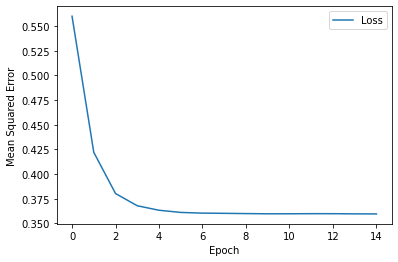


 Evaluate the linear regression model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 3ms/step - loss: 0.3962 - mean_squared_error: 0.3962


[0.3961631655693054, 0.3961631655693054]

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.

epochs, mse = train_model(my_model, train_df_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

**Deep neural net model**

In [14]:
def create_model(my_learning_rate, my_feature_layer):
  model = tf.keras.models.Sequential()
  model.add(my_feature_layer)
  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
   # Define the second hidden layer with 12 nodes.
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
   # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1, name='Output'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

   

In [15]:
def train_model(model, dataset, epochs, label_name, batch_size=None):
  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle = True)
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  
  mse = hist["mean_squared_error"]

  return epochs, mse

  


Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 0s 5ms/step - loss: 0.5617 - mean_squared_error: 0.5617
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3597 - mean_squared_error: 0.3597
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3449 - mean_squared_error: 0.3449
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3389 - mean_squared_error: 0.3389
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3357 - mean_squared_error: 0.3357
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3340 - mean_squared_error: 0.3340
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3328 - mean_squared_error: 0.3328
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3318 - mean_squared_error: 0.3318
Epoch 9/20
17/17 [========

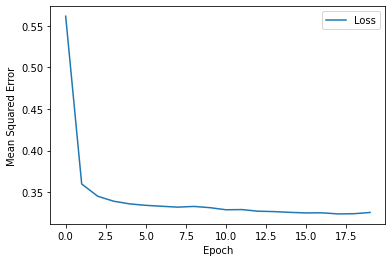


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 4ms/step - loss: 0.3636 - mean_squared_error: 0.3636


[0.363615483045578, 0.363615483045578]

In [17]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000
# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse  = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)



In [21]:
def create_model(my_learning_rate, my_feature_layer):
  model = tf.keras.models.Sequential()
  model.add(my_feature_layer)
  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
   # Define the second hidden layer with 12 nodes.
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  # Define the second hidden layer with 8 nodes.
  model.add(tf.keras.layers.Dense(units=8, 
                                  activation='relu', 
                                  name='Hidden3'))
   # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1, name='Output'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
  return model


Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
17/17 [==============================] - 0s 3ms/step - loss: 0.6940 - mean_squared_error: 0.6940
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.4550 - mean_squared_error: 0.4550
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3650 - mean_squared_error: 0.3650
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3454 - mean_squared_error: 0.3454
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3390 - mean_squared_error: 0.3390
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3360 - mean_squared_error: 0.3360
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3337 - mean_squared_error: 0.3337
Epoch 8/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3316 - mean_squared_error: 0.3316
Epoch 9/20
17/17 [========

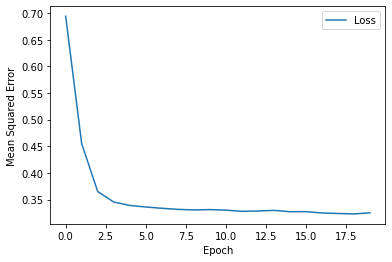


 Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
3/3 [==============================] - 0s 2ms/step - loss: 0.3675 - mean_squared_error: 0.3675


[0.367455393075943, 0.367455393075943]

In [23]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 1000
# Specify the label
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse  = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)
